### Nama: Sabina Nurlatifah Aurelia
### NIM : 2209106002
### Kelas: Informatika A1 2022
### POSTTEST 7

Link dataset: https://www.kaggle.com/datasets/mdsagorahmed/fruit-image-dataset-22-classes

Import library

In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import splitfolders
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

direktori data

In [5]:
base_dir = 'grapes'

Bagi dataset menjadi 3 bagian yaitu test, train, dan val

In [6]:
splitfolders.ratio(base_dir,
                    output="dataset_final",
                   seed=1337,
                   ratio=[.8,.1,.1])

In [7]:
test_img_path = 'dataset_final/test'
train_img_path = 'dataset_final/train'
val_img_path = 'dataset_final/val'
class_name = os.listdir(train_img_path)

Nama kelas dataset

In [8]:
class_name

['ripe grapes', 'unripe grapes']

ImageDataGenerator

In [9]:
# ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    fill_mode='nearest'
)

In [10]:
# Train Generator
train_generator = train_datagen.flow_from_directory(
    train_img_path,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary' # jika hanya ada 2 Kelas memakai binary (Matang |Ripe| dan Unripe |Tidak Matang|
)

# Validation Generator
validation_generator = train_datagen.flow_from_directory(
    val_img_path,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Test Generator
test_generator = train_datagen.flow_from_directory(
    test_img_path,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
)

Found 256 images belonging to 2 classes.
Found 31 images belonging to 2 classes.
Found 35 images belonging to 2 classes.


Menampilkan beberapa gambar dari train generator

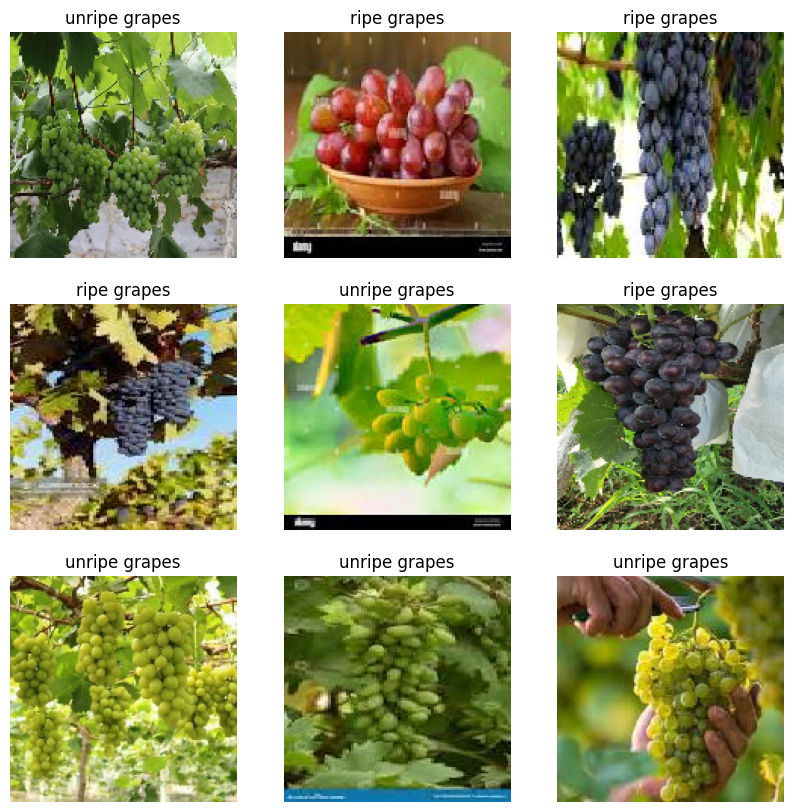

In [11]:
plt.figure(figsize=(10, 10))
for images, labels in train_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(class_name[int(labels[i])])
        plt.axis("off")
    break
plt.show()

Sequential Modelling

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

Model Compile

In [16]:
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy'],
)

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

history = model.fit(  
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/100
8/8 [==============================] - 7s 683ms/step - loss: 0.7538 - accuracy: 0.5117 - val_loss: 0.6332 - val_accuracy: 0.5161
Epoch 2/100
8/8 [==============================] - 4s 469ms/step - loss: 0.4764 - accuracy: 0.8242 - val_loss: 0.1679 - val_accuracy: 1.0000
Epoch 3/100
8/8 [==============================] - 4s 465ms/step - loss: 0.1701 - accuracy: 0.9336 - val_loss: 0.0540 - val_accuracy: 0.9677
Epoch 4/100
8/8 [==============================] - 4s 483ms/step - loss: 0.0898 - accuracy: 0.9609 - val_loss: 0.0266 - val_accuracy: 0.9677
Epoch 5/100
8/8 [==============================] - 4s 472ms/step - loss: 0.0446 - accuracy: 0.9805 - val_loss: 0.0081 - val_accuracy: 1.0000
Epoch 6/100
8/8 [==============================] - 4s 480ms/step - loss: 0.0406 - accuracy: 0.9844 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 7/100
8/8 [==============================] - 4s 489ms/step - loss: 0.0186 - accuracy: 0.9922 - val_loss: 0.0878 - val_accuracy: 0.9677
Epoch 8/100
8

Model Evaluate

In [18]:
model.evaluate(test_generator)

2/2 [==============================] - 0s 20ms/step - loss: 0.1535 - accuracy: 1.0000


[0.15350668132305145, 1.0]

Grafik pergerakan metrics akurasi dan loss training validation

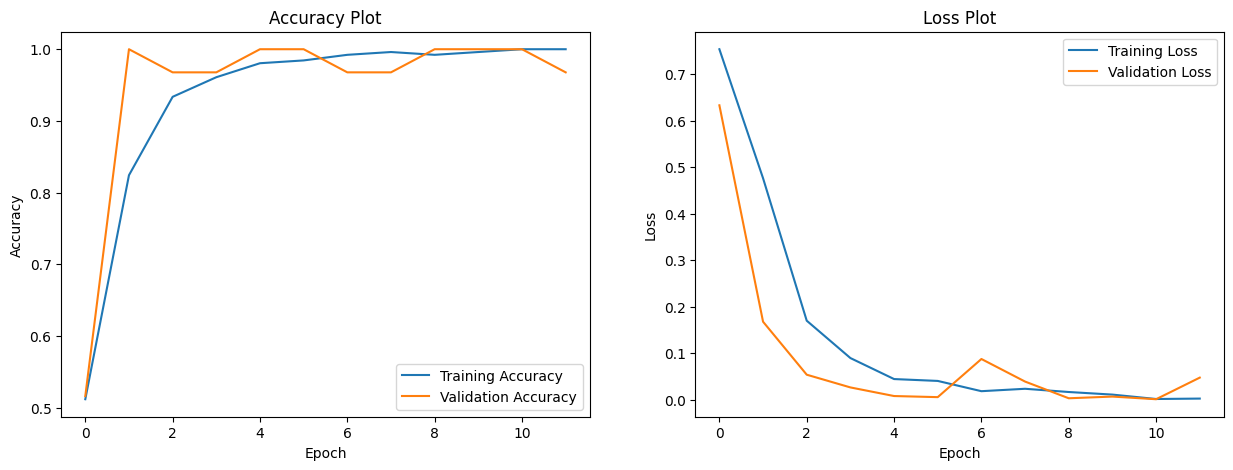

In [19]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [20]:
from PIL import Image
import numpy as np
from skimage import transform 

In [22]:
def load (filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image)
    np_image = transform.resize(np_image, (150,150,3))
    np_image = np.expand_dims(np_image, axis=0)
    return np_image

image = load(r'unripe.jpg')
img_pred = model.predict(image)

1/1 [==============================] - 0s 223ms/step


In [23]:
pred = np.where(img_pred > 0.5,"Unripe","Ripe")
pred

array([['Unripe']], dtype='<U6')

In [25]:
def load (filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image)
    np_image = transform.resize(np_image, (150,150,3))
    np_image = np.expand_dims(np_image, axis=0)
    return np_image

image = load(r'ripe grapes.jpg')
img_pred = model.predict(image)

1/1 [==============================] - 0s 41ms/step


In [26]:
pred = np.where(img_pred > 0.5,"Unripe","Ripe")
pred

array([['Ripe']], dtype='<U6')